In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [4]:
df = pd.read_csv("diabetes.csv") 

In [6]:
print("=== Dataset Info ===")
print(df.info())
print("\n=== Summary Statistics ===")
print(df.describe())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

=== Summary Statistics ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531    

In [7]:
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    median = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median)


=== Univariate Analysis ===


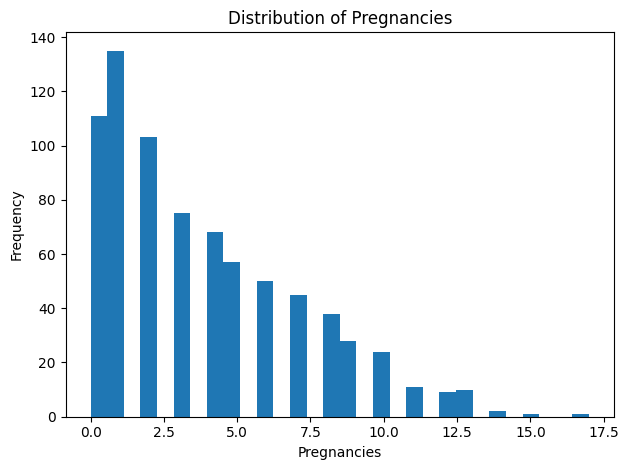

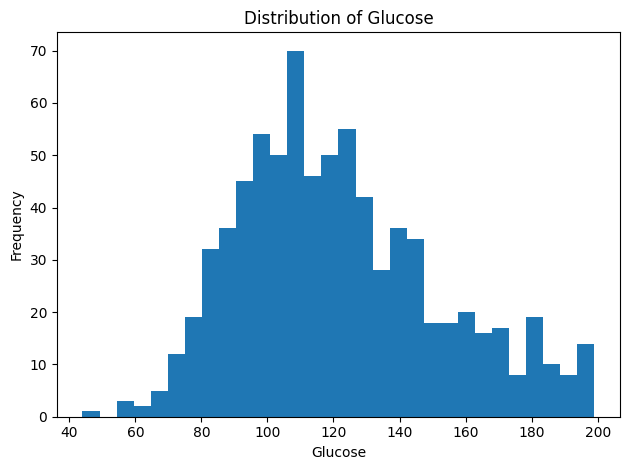

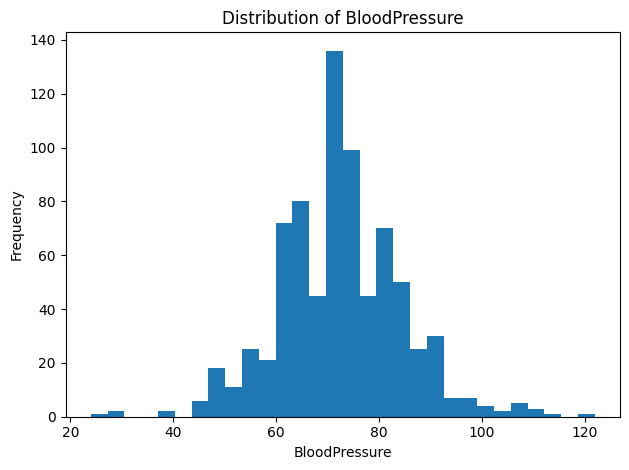

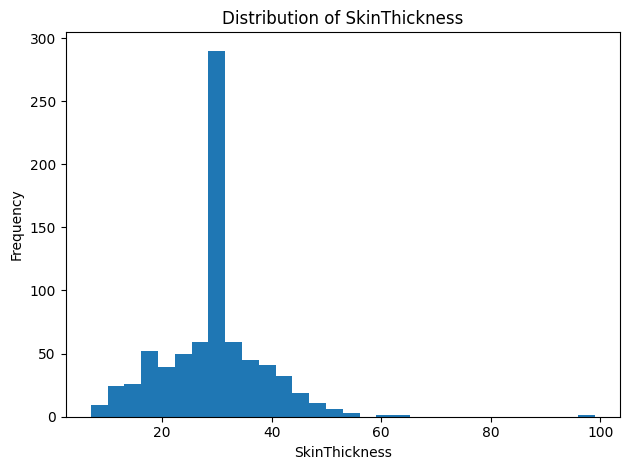

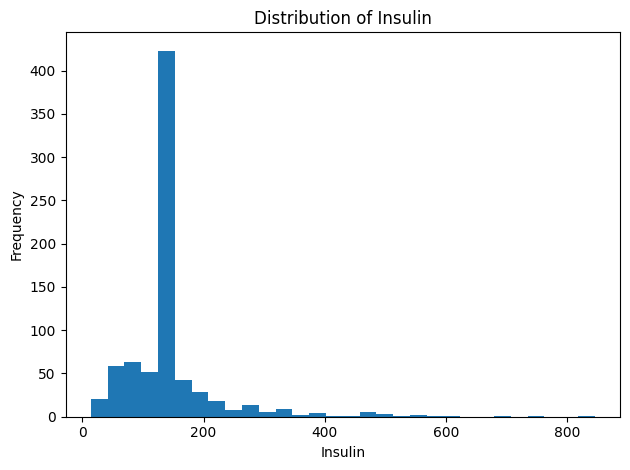

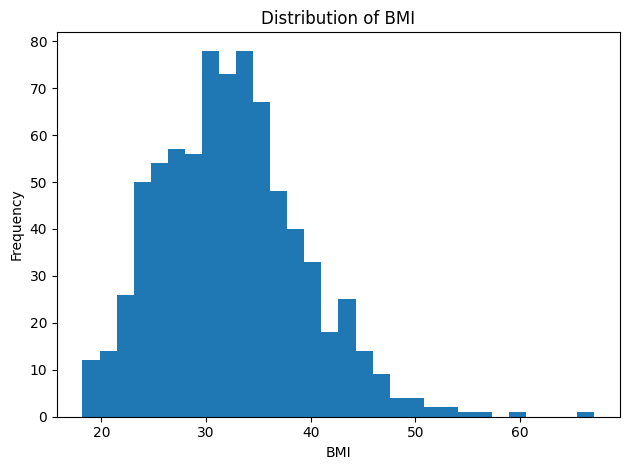

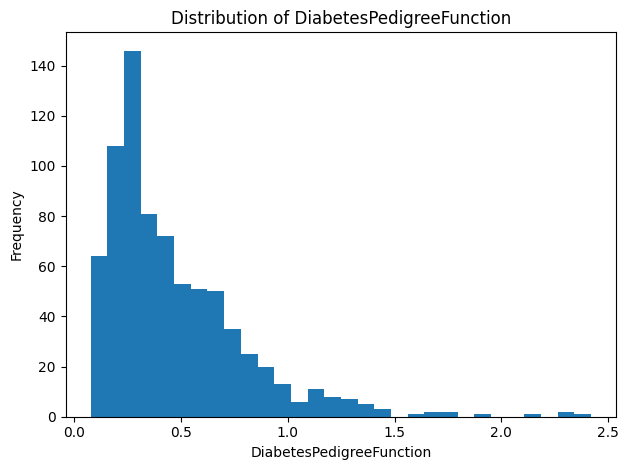

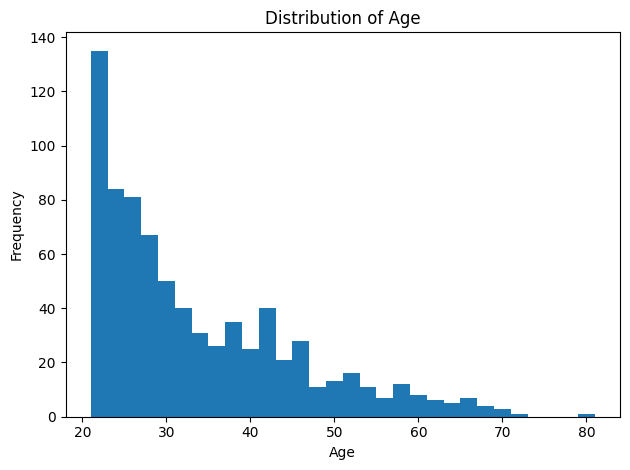

In [8]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("\n=== Univariate Analysis ===")
for col in numeric_columns:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.tight_layout()
    plt.show()  # Display inline

In [6]:
print("\n=== Bivariate Analysis ===")
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Diabetes Outcome')
    plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.savefig(f"boxplot_{col}.png")  # Save boxplots
    plt.close()



=== Bivariate Analysis ===



=== Bivariate Analysis ===


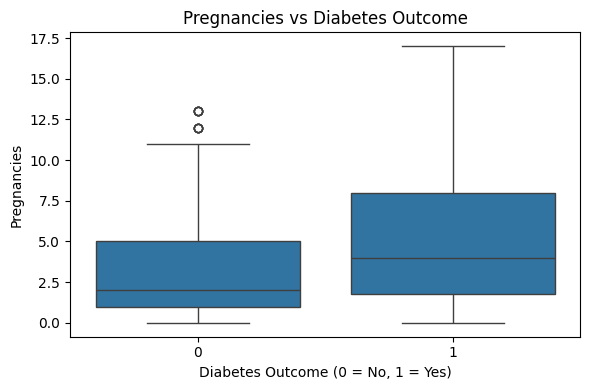

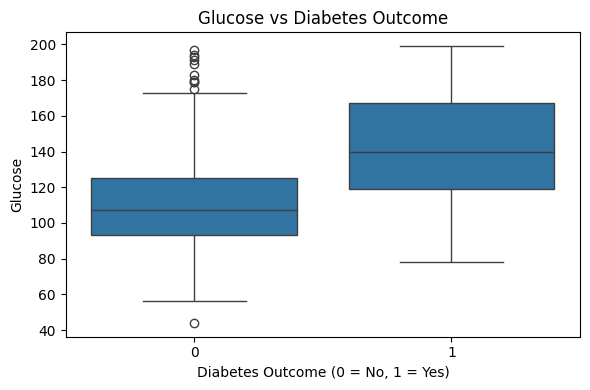

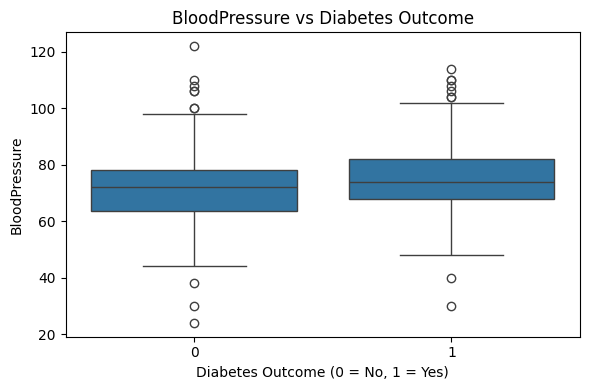

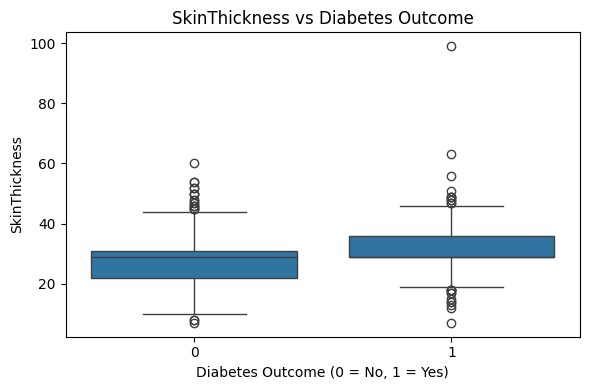

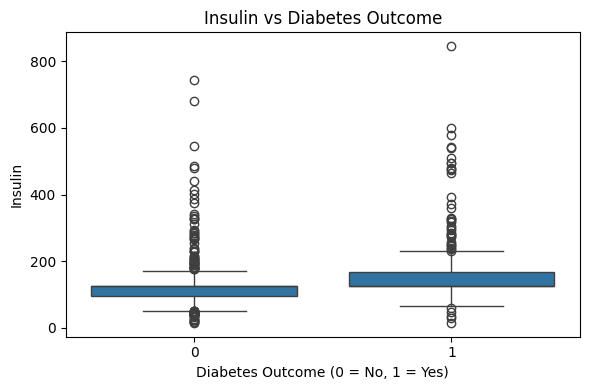

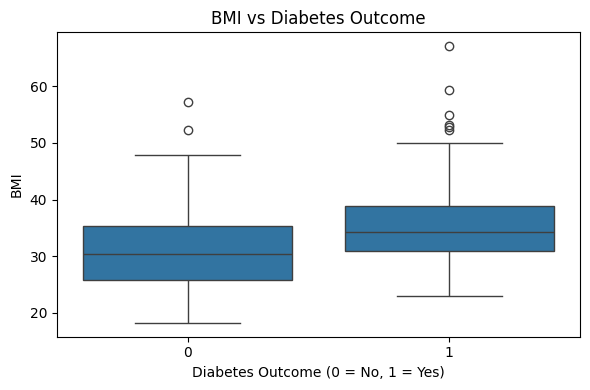

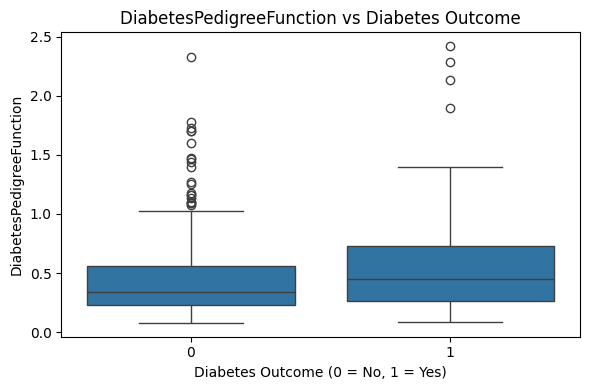

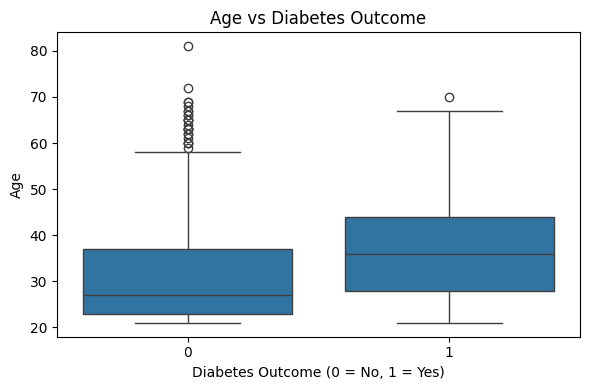

In [9]:
# Step 6: Bivariate Analysis - Boxplots vs Outcome
print("\n=== Bivariate Analysis ===")
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Diabetes Outcome')
    plt.xlabel('Diabetes Outcome (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()  


=== Correlation Heatmap ===


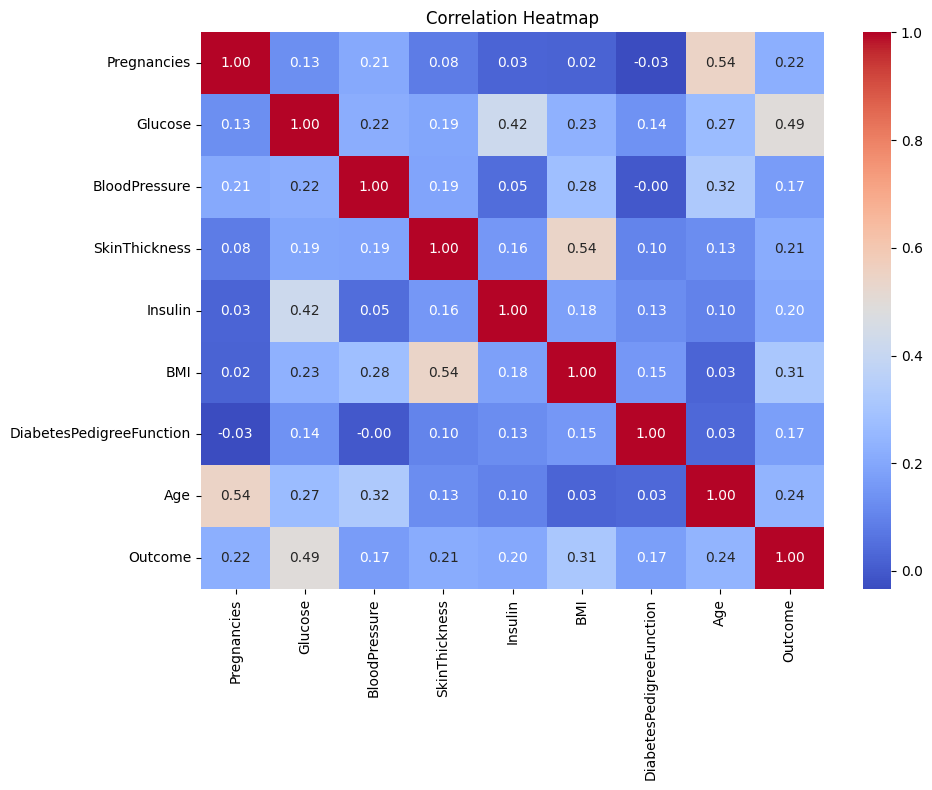

In [10]:
print("\n=== Correlation Heatmap ===")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()  # Display inline

In [11]:
print("\n=== T-Test Results (Diabetes vs Non-Diabetes) ===")
t_test_results = {}
for col in numeric_columns:
    group0 = df[df['Outcome'] == 0][col]
    group1 = df[df['Outcome'] == 1][col]
    stat, p_value = ttest_ind(group0, group1)
    t_test_results[col] = p_value



=== T-Test Results (Diabetes vs Non-Diabetes) ===


In [12]:
t_test_df = pd.DataFrame(t_test_results.items(), columns=["Feature", "P-Value"])
t_test_df = t_test_df.sort_values(by="P-Value")
print(t_test_df)


                    Feature       P-Value
1                   Glucose  3.128719e-48
5                       BMI  8.336903e-19
7                       Age  2.209975e-11
0               Pregnancies  5.065127e-10
3             SkinThickness  1.793958e-09
4                   Insulin  1.210026e-08
6  DiabetesPedigreeFunction  1.254607e-06
2             BloodPressure  3.890835e-06


In [13]:
df.to_csv("diabetes_cleaned.csv", index=False)
